**Membres du groupe:**

1.   INGABIRE Alvin
2.   MEDOM SADEFO Michele
3.   NIYONKURU Berline Cléria


# **1. Présentation des données**

Jeu de données comportant les infos sur la consommation par région de france depuis le 01-06-2022 jusqu'au 19/11/2023.

Ce jeu de données, rafraîchi une fois par heure présente des données régionales "temps réel" issues de l'application éCO2mix. Elles proviennent des télémesures des ouvrages complétées par des forfaits et estimations.

Vous y trouverez au pas quart d'heure:

_12 régions de la France à savoir: *Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Bretagne, Centre-Val de Loire, Grand-Est, Hauts-de-France, Île-de-France, Normandie, Nouvelle-Aquitaine, Occitanie, Pays de la Loire et Provence-Alpes-Côte d'Azur.*

_La consommation totale réalisée.

_La production selon les différentes filières composant le mix énergétique.

_La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).

_Le solde des échanges physiques avec les régions limitrophes.

_TCO : le Taux de COuverture (TCO) d'une filière de production au sein d'une région représente la part de cette filière dans la consommation de cette région

_TCH : le Taux de CHarge (TCH) ou facteur de charge (FC) d'une filière représente son volume de production par rapport à la capacité de production installée et en service de cette filière

_La date et l'heure de la prise des mesures

[Lien vers les données]( https://odre.opendatasoft.com/explore/dataset/eco2mix-regional-tr/table/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [41]:
# Importer le fichier eco2mix-regional-tr.csv
data= pd.read_csv("eco2mix-regional-tr.csv", sep=";")
data.head()
data.columns


Index(['Code INSEE région', 'Région', 'Nature', 'Date', 'Heure',
       'Date - Heure', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'Stockage batterie',
       'Déstockage batterie', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)',
       'TCO Hydraulique (%)', 'TCH Hydraulique (%)', 'TCO Bioénergies (%)',
       'TCH Bioénergies (%)', 'Column 68'],
      dtype='object')

## ***2. Nettoyage du jeu de données:***

In [37]:
colonnes_a_supprimer=["Déstockage batterie","Stockage batterie",'Column 68','Nature']
data_nettoye= data.drop(colonnes_a_supprimer, axis = 1)


In [38]:
#Prenons une même date et une même heure pour afficher nos graphiques
heure= '15:00'
date= '2022-07-15'
date2= '2023-07-15'

#nettoyage pour les graphiques de la première partie
masque = (data_nettoye['Heure'] == heure)

data_15= data_nettoye[masque]

masque22= (data_15['Date'] == date)
masque23= (data_15['Date'] == date2)

data_15_juillet_2022= data_15[masque22]
data_15_juillet_2023= data_15[masque23]

data_first = data_15_juillet_2022.drop_duplicates(subset='Région', keep='first')
data_second = data_15_juillet_2023.drop_duplicates(subset='Région', keep='first')


#intervalle de temps pour montrer l'évolution
date_debut = '2022-09-01'
date_fin = '2023-09-01'

#nettoyage pour les graphiques de la deuxième partie
mask = (data['Heure'] == heure) & (data['Date'] >= date_debut) & (data['Date'] <= date_fin)
data_selected_hour = data[mask]


# **3. Graphiques**

1.   Alvin

Ci suit 2 graphiques represéntant :

*   la comparaison de la consommation d'énergie par région le 15 juillet 2022 et 15 juillet 2023 à 15h
*   la corrélation entre la production d'une bioénergie
et la part de cette production dans la consommation totale d'énergie



*✅Graphique de la consommation d'énergie par région*

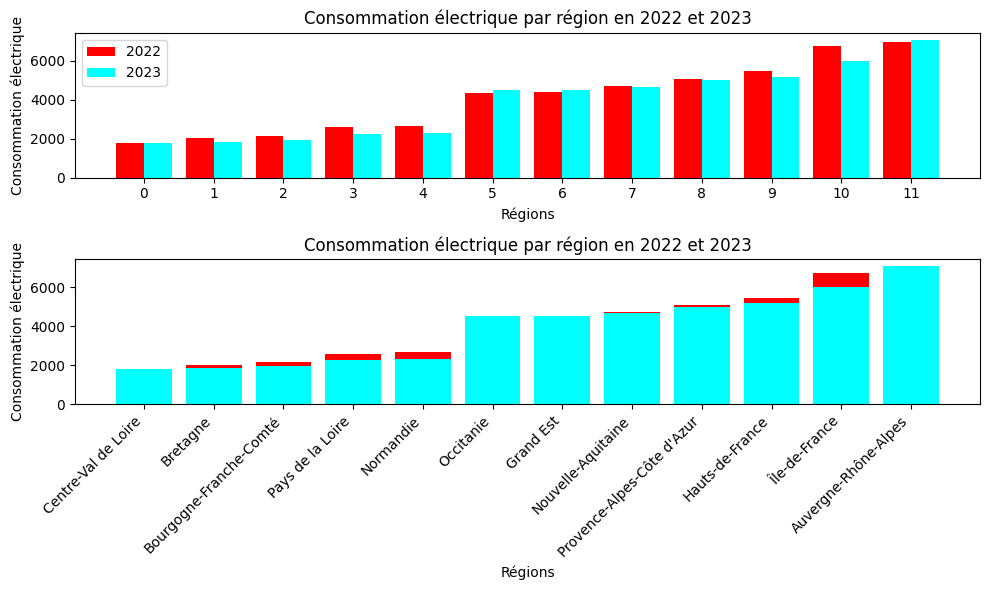

In [39]:
data_first = data_first.sort_values(by='Consommation (MW)')
data_second = data_second.sort_values(by='Consommation (MW)')

x = data_first['Région']
x2= data_second['Région']
y1 = data_first['Consommation (MW)']
y2 = data_second['Consommation (MW)']

# Création de positions pour les barres
x_pos = np.arange(len(x))
x_pos_1 = np.arange(len(x2))

#diviser la fenêtre pour afficher les graphiques
fig, ax = plt.subplots(2,1,figsize=(10, 6))  # 2 lignes, 1 colonne

# Largeur des barres
bar_width = 0.4

# Premier graphique
ax[0].bar(x_pos - bar_width/2, y1, color="red", width=bar_width, label='2022')
ax[0].bar(x_pos_1 + bar_width/2, y2, color="cyan", width=bar_width, label='2023')

ax[0].set_xlabel("Régions")
ax[0].set_ylabel("Consommation électrique")
ax[0].set_title("Consommation électrique par région en 2022 et 2023")
ax[0].set_xticks(x_pos)
ax[0].set_xticks(x_pos_1)
ax[0].legend()

# Deuxième graphique
ax[1].bar(x_pos, y1, color="red", label='2022')
ax[1].bar(x_pos_1, y2, color="cyan", label='2023')

ax[1].set_xlabel("Régions")
ax[1].set_ylabel("Consommation électrique")
ax[1].set_title("Consommation électrique par région en 2022 et 2023")
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(x, rotation=45, ha='right')
ax[1].set_xticks(x_pos_1)
ax[1].set_xticklabels(x2, rotation=45, ha='right')

plt.tight_layout() # Pour éviter que les graphiques se chevauchent
plt.show()


*✅Graphique représentant la corrélation entre le TCO bioénergie et la production bioénergetique*

<ipython-input-47-7f1da7524427>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # Style des graphiques


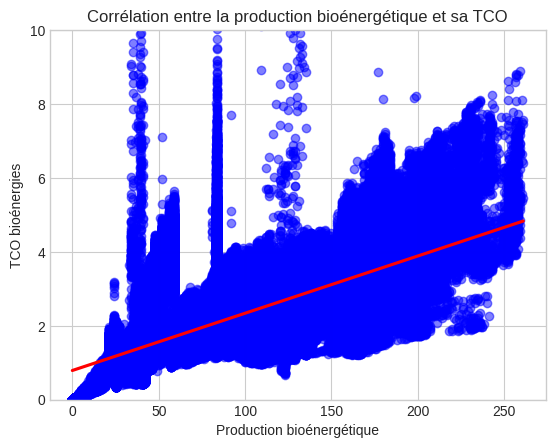

In [47]:
plt.style.use('seaborn-whitegrid')  # Style des graphiques

# Création d'un nuage de points avec régression linéaire
sns.regplot(x='Bioénergies (MW)', y='TCO Bioénergies (%)', data=data_nettoye, scatter_kws={'alpha':0.5}, color='blue',line_kws={'color': 'red'})

# Ajout de titres et d'étiquettes d'axes
plt.title('Corrélation entre la production bioénergétique et sa TCO')
plt.xlabel('Production bioénergétique')
plt.ylabel('TCO bioénergies')
plt.ylim(0,10)

plt.show()


2.   Michele

Ci suit 2 graphiques represéntant :

*   l'évolution de la part de la production thermique et hydraulique dans la consommation énergetique
*   la commparaison des évolutions de la production solaire et de la production thermique


*✅Graphique montrant les tco thermique et hydraulique*

<ipython-input-40-54de6976e47f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')


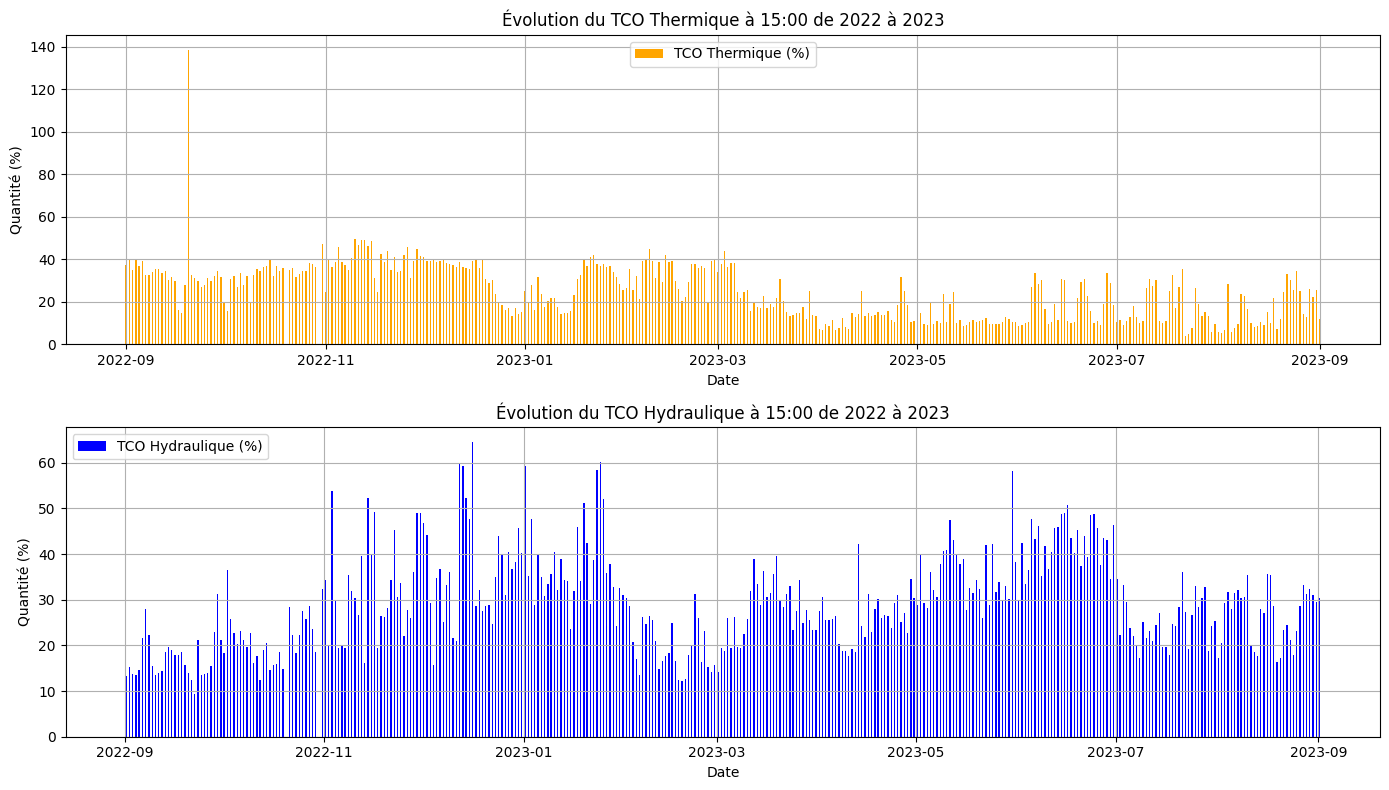

In [40]:
# conversion de la colonne 'Date' en type datetime
data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
bar_width = 0.4

# Premier graphique
ax[0].bar(data_selected_hour['Date'], data_selected_hour["TCO Thermique (%)"], color="orange", width=bar_width, label="TCO Thermique (%)", align='center')
ax[0].set_title(f'Évolution du TCO Thermique à {heure} de 2022 à 2023')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Quantité (%)')
ax[0].legend()
ax[0].grid(True)

# Deuxième graphique
ax[1].bar(data_selected_hour['Date'] + pd.Timedelta(bar_width, unit='d'), data_selected_hour["TCO Hydraulique (%)"], color="blue", width=bar_width, label="TCO Hydraulique (%)", align='center')
ax[1].set_title(f'Évolution du TCO Hydraulique à {heure} de 2022 à 2023')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Quantité (%)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


*✅Graphique des évolutions de la production solaire et de la production thermique*

<ipython-input-42-fc0fce0c01d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')


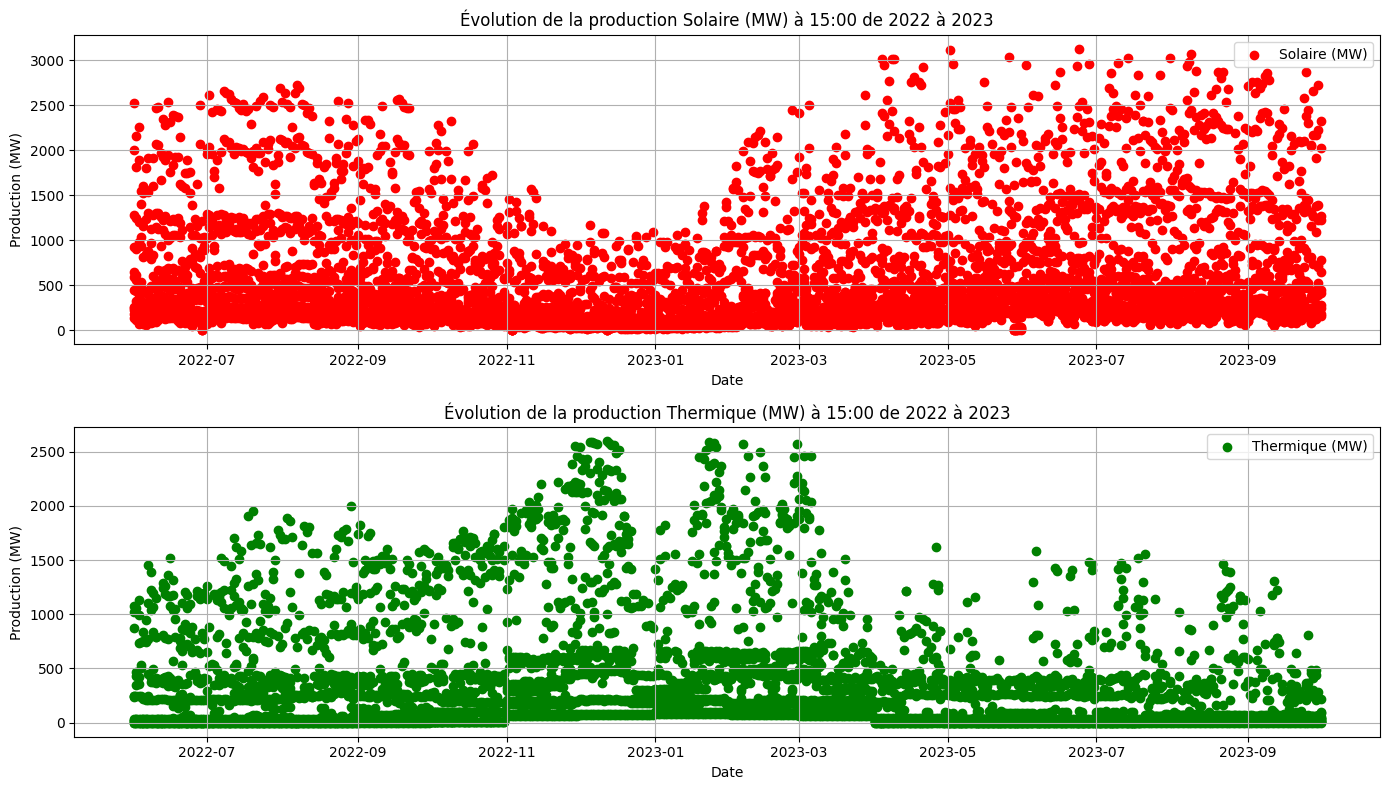

In [42]:
#modifions la durée d'affichage
date_debut = '2022-04-01'
date_fin = '2023-10-01'

mask = (data['Heure'] == heure) & (data['Date'] >= date_debut) & (data['Date'] <= date_fin)
data_selected_hour = data[mask]

data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')

fig, ax = plt.subplots(2, 1, figsize=(14, 8))

# Assigner une couleur différente à chaque énergie produite
colors = { 'Solaire (MW)': 'red', 'Thermique (MW)':'green'}  # Ajoutez d'autres énergies au besoin

for i, (energy, color) in enumerate(colors.items()):
    ax[i].scatter(data_selected_hour['Date'], data_selected_hour[energy], label=energy, color=color)
    ax[i].set_title(f'Évolution de la production {energy} à {heure} de 2022 à 2023')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Production (MW)')
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()


3.   Berline

Ci suit 2 graphiques represéntant :


*   la variance de la part de la production bioénergetique par région
*   la prédiction de la consommation énergetique par région



*✅Graphique de la variance du TCO bioénergies*


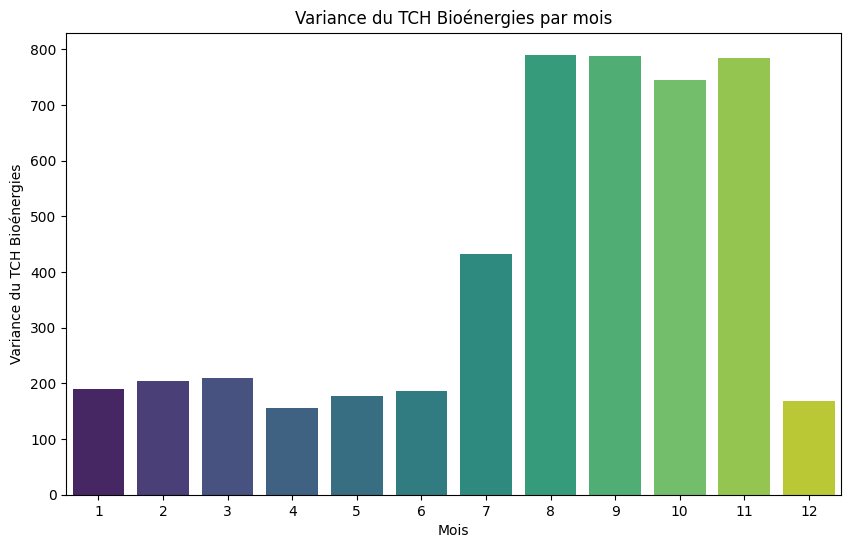

In [43]:
data['Mois'] = pd.to_datetime(data['Date']).dt.month
moyenne_tch_par_mois = data.groupby('Mois')['TCH Bioénergies (%)'].mean()
variance_tch_par_mois = data.groupby('Mois')['TCH Bioénergies (%)'].var()

variance_df = variance_tch_par_mois.reset_index(name='Variance TCH Bioénergies')

# Tracer le graphique à barres avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='Variance TCH Bioénergies', data=variance_df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel('Mois')
plt.ylabel('Variance du TCH Bioénergies')
plt.title('Variance du TCH Bioénergies par mois')

# Afficher le graphique
plt.show()

*✅Graphique pour les prédictions*


In [44]:
colonnes= ['Consommation (MW)', 'Mois']
data_a_predire = data[colonnes]
variable_a_predire = data["Consommation (MW)"]

X =data_a_predire['Consommation (MW)'].dropna()
y=variable_a_predire.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
error_metric = mean_squared_error(y_pred = y_pred_test, y_true = y_test)
print(error_metric)



0.0


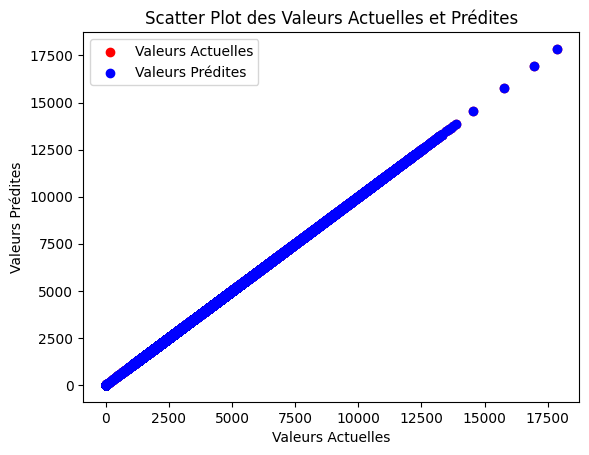

In [45]:
plt.scatter(X_test, y_test, color='red', label='Valeurs Actuelles')

plt.scatter(X_test, y_pred_test, color='blue', label='Valeurs Prédites')

plt.xlabel('Valeurs Actuelles')
plt.ylabel('Valeurs Prédites')
plt.title('Scatter Plot des Valeurs Actuelles et Prédites')
plt.legend()

plt.show()